In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df=pd.read_csv("Insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [4]:
# shape

In [5]:
df.shape

(1338, 7)

In [6]:
# dtypes

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# missing values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# describe

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Distribution

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

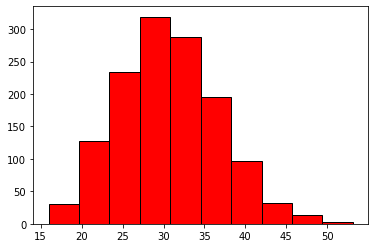

In [13]:
plt.hist(df.bmi,color='r',edgecolor='black')

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

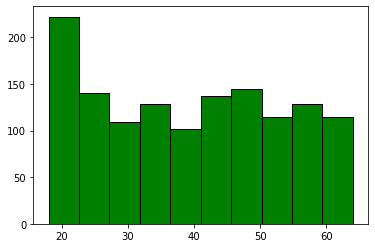

In [14]:
plt.hist(df.age,color='g',edgecolor='black')

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

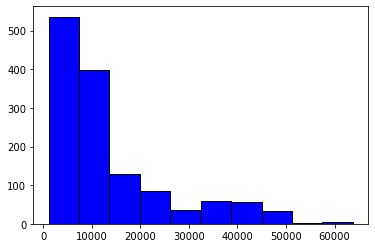

In [15]:
plt.hist(df.charges,color='b',edgecolor='black')

In [16]:
# Skewness

In [17]:
df[['age','bmi','charges']].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

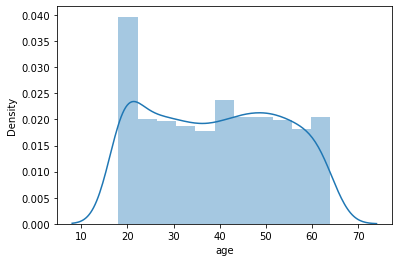

In [18]:
sns.distplot(df.age)

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

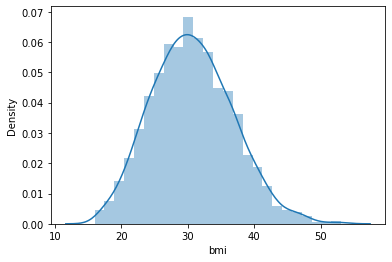

In [19]:
sns.distplot(df.bmi)

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

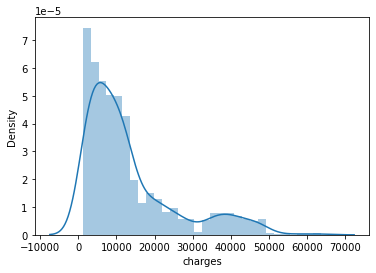

In [20]:
sns.distplot(df.charges)

In [21]:
# Outliers

<AxesSubplot:>

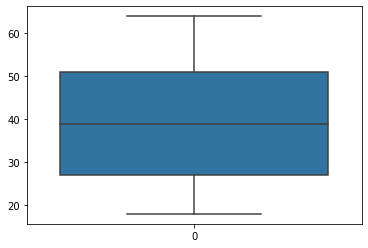

In [22]:
sns.boxplot(data=df.age)

<AxesSubplot:>

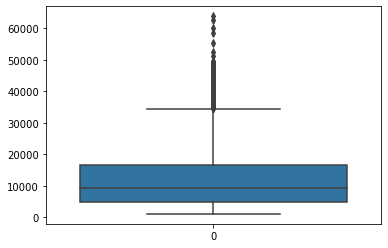

In [23]:
sns.boxplot(data=df.charges)

<AxesSubplot:>

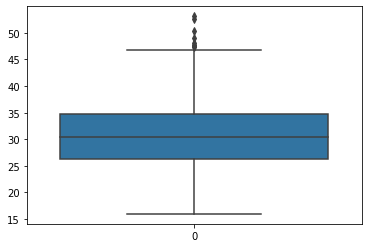

In [24]:
sns.boxplot(data=df.bmi)

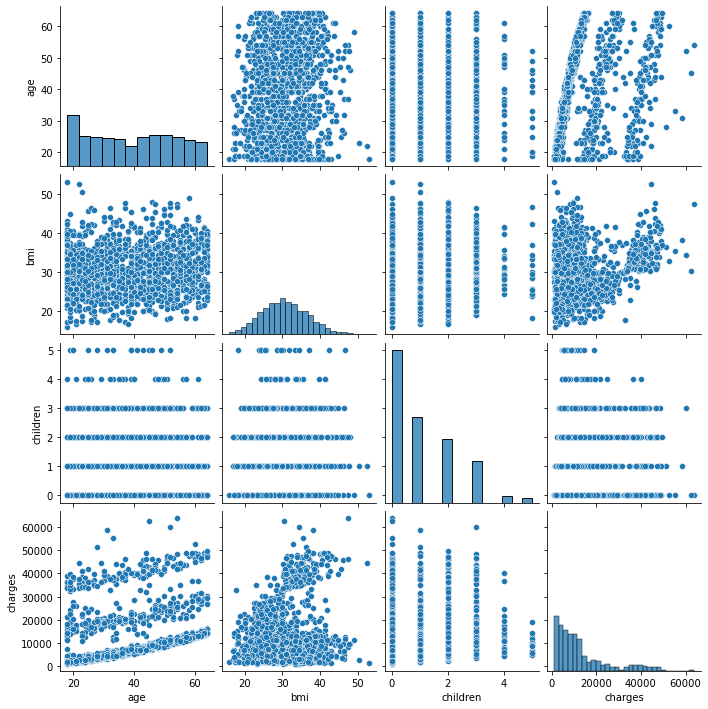

In [25]:
sns.pairplot(data=df)

# 1. Difference between charges of smokers and charges of non smoker is apparent

<AxesSubplot:xlabel='age', ylabel='charges'>

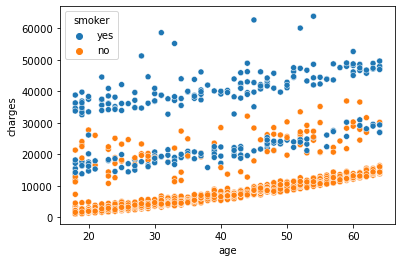

In [26]:
sns.scatterplot(x=df.age,y=df.charges,hue=df.smoker)

In [ ]:
# Hypothesis Testing

In [27]:
Ho="charges of smoker and non smoker are same"# null hypothesis
Ha="charges of smoker and non smoker are not same"# alternate hypothesis

In [28]:
x=np.array(df[df.smoker=='yes'].charges)
y=np.array(df[df.smoker=='no'].charges)

In [29]:
t,p_value=stats.ttest_ind(x,y,axis=0)
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value}) > 0.05')

charges of smoker and non smoker are not same as the p_value(8.271435842179102e-283) < 0.05


#### hence the charges of smoker and that of non smoker are not the same

# 2.Does bmi of males differ significantly from that of females

<AxesSubplot:xlabel='sex', ylabel='bmi'>

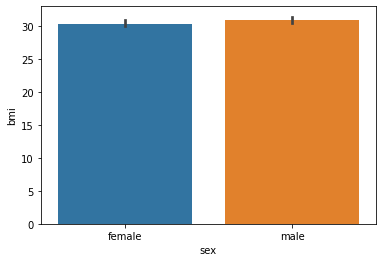

In [30]:
sns.barplot(x=df.sex,y=df.bmi)

In [ ]:
# Hypothesis Testing

In [31]:
Ho="BMI of male and female are same"# null hypothesis
Ha="BMI of male and female are not same"# alternate hypothesis

In [32]:
x=np.array(df[df.sex=='male'].bmi)
y=np.array(df[df.sex=='female'].bmi)

In [33]:
t,p_value=stats.ttest_ind(x,y,axis=0)
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value}) > 0.05')

BMI of male and female are same as the p_value(0.08997637178984932) > 0.05


### The BMI of male and female are almost the same

# 3. Is there a relationship between gender and charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

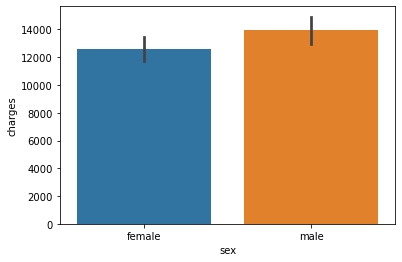

In [34]:
sns.barplot(x=df.sex,y=df.charges)

In [ ]:
# Hypothesis Testing

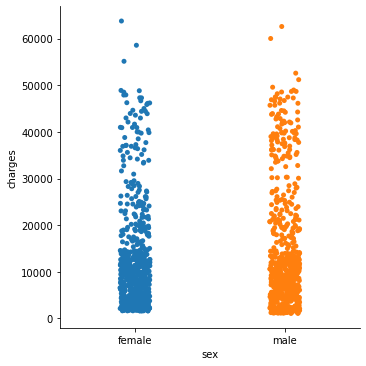

In [35]:
sns.catplot(x='sex',y='charges',jitter=True,data=df)

In [36]:
Ho="Charges of male and female are same"# null hypothesis
Ha="Charges of male and female are not same"# alternate hypothesis

In [37]:
x=np.array(df[df.sex=='male'].charges)
y=np.array(df[df.sex=='female'].charges)

In [38]:
t,p_value=stats.ttest_ind(x,y,axis=0)
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value}) > 0.05')

Charges of male and female are not same as the p_value(0.03613272100592976) < 0.05


### Yes,the Charges of male and female are not the same

# 4. Is the proportion of smokers significantly different in different genders

In [ ]:
# Hypothesis Testing

In [39]:
# Chi 
Ho="Gender has no effect on smoking habits"# null hypothesis
Ha="Gender has effect on smoking habits"# alternate hypothesis

In [40]:
crosstab=pd.crosstab(df['smoker'],df['sex'])
chi, p_value, dof, ex = stats.chi2_contingency(crosstab)


In [41]:
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value}) > 0.05')
crosstab

Gender has effect on smoking habits as the p_value(0.006548143503580696) < 0.05


sex,female,male
smoker,,
no,547,517
yes,115,159


### yes, different genders have different proportion of smokers

# 5. Is the distribution of BMI across women with no children , one child and two children or same

In [ ]:
# Hypothesis Testing

<AxesSubplot:xlabel='sex', ylabel='bmi'>

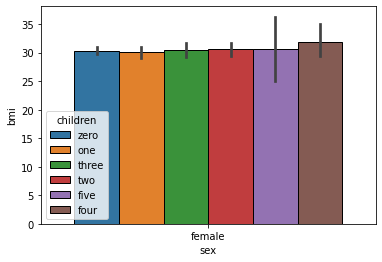

In [59]:
df2=(df[df.sex=='female']).sex
df2
df1=df.children.replace([0,1,2,3,4,5],['zero','one','two','three','four','five'])
sns.barplot(x=df2,y=df.bmi,hue=df1,edgecolor='black')